# Ocorrências criminais no Brasil

Weslei Luiz de Paula Pinto

Felipe Menino Carlos

14 de novembro de 2018

## Sobre

Esta análise foi criada como um dos trabalhos da matéria de Laboratório de bancos de dados, da Fatec SJC.

Os dados aqui utilizados foram disponibilizados [aqui](http://dados.gov.br/dataset/sistema-nacional-de-estatisticas-de-seguranca-publica), pelo Sistema Nacional de Estatísticas de Segurança Pública e Justiça Criminal (**SINESPJC**).

Todos os scripts utilizados, tanto para a análise quanto para a aquisição dos dados está disponível no [Github](https://github.com/M3nin0/ocorrencias-brasil), estes foram criados para tornar este documento mais simples.

## Análise dos dados

Todo o processo da análise destes dados foram documentados para a fácil replicão. O processo seguido utiliza ideias gerais de análise exploratória de dados.

Vamos começar carregando os scripts criados para facilitar a análise.

In [268]:
import pandas as pd
import glob
from src.python.data_utils import *

Primeiro vamos tratar de apenas um ano, para depois expandir a análise para todos os dados disponíveis. O ano escolhido foi 2013.

In [269]:
year = read_year_data(2013)

Com os dados carregados vamos olhar como é sua estrutura.

In [270]:
year.head(7)

,regiao,uf,estado,codigo_IBGE,municipio,crime,ano,mes,ocorrencias
0,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,1,01/2013,4.0
1,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,2,02/2013,5.0
2,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,3,03/2013,1.0
3,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,4,04/2013,6.0
4,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,5,05/2013,4.0
5,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,6,06/2013,4.0
6,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,7,07/2013,2.0


A coluna **codigo_IBGE** não é interessante nesta análise, portanto será excluida

In [271]:
del(year['codigo_IBGE'])

Para verificar como a estrutura dos dados foi alterada o comando head foi utilizado

In [272]:
year.head(10)

,regiao,uf,estado,municipio,crime,ano,mes,ocorrencias
0,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,1,01/2013,4.0
1,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,2,02/2013,5.0
2,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,3,03/2013,1.0
3,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,4,04/2013,6.0
4,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,5,05/2013,4.0
5,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,6,06/2013,4.0
6,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,7,07/2013,2.0
7,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,8,08/2013,1.0
8,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,9,09/2013,5.0
9,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,10,10/2013,1.0


Agora que conhecemos a estrutura básica, vamos pegar informações de estatísticas gerais destes dados.

In [273]:
year.describe()

,ano,ocorrencias
count,60460.000000,60460.000000
mean,6.334701,7.354848
std,3.453378,30.759189
min,1.000000,1.000000
25%,3.000000,1.000000
50%,6.000000,2.000000
75%,9.000000,4.000000
max,12.000000,975.000000


Com estas estatísticas gerais já é possível começar a gerar perguntar para prosseguir com a análise dos dados. Ao olhar estas informações, me veio as seguintes perguntas

- Qual o tipo de crime tem a maior quantidade de ocorrência no ano de 2013 ?
- Qual dos meses tem a maior taxa de cada um dos crimes no conjunto de dados ?
- Quais cidades apresentam as maiores quantidades de cada um dos crimes presentes nos dados ?

As perguntas acima nos guiará com a análise destes dados.

### Crime mais frequente em 2013

Bem vamos começar realizando uma análise dos crimes mais frequentes em 2013. 

In [274]:
crime = year.groupby(['crime'])
occurrences = crime.agg({'ocorrencias':sum})
occurrences

,ocorrencias
crime,
Estupro,49856.000
Furto de veículo,187795.905
Homicídio doloso,47141.000
Lesão corporal seguida de morte,1023.000
Roubo de veículo,157057.209
Roubo seguido de morte (latrocínio),1801.000


Veja que neste ano de forma geral o furto de carros foi muito alto! E infelizmente o número de estrupos também foi muito grande. Mas aqui vamos criar uma forma de visualizar estes dados mais facilmente, utilizando um gráfico de barras!

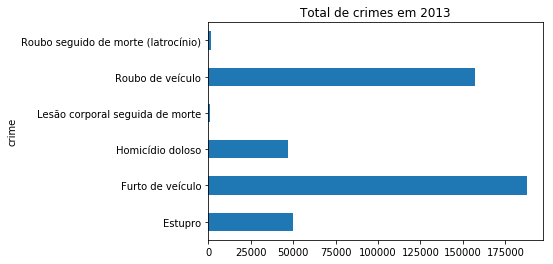

In [275]:
occurrences.plot.barh(legend=False, title="Total de crimes em 2013")

Veja, a interpretação tornou-se mais simples! Agora que sabemos qual foi o crime mais cometido no ano de 2013, vamos decobrir como foi a distribuição destas quantidades de ocorrências nos meses.

### Meses e suas taxas de crimes (2013)

Para obter esta informação, vamos primeiro agrupar os dados levando em consideração os meses, e então, contar as ocorrências de cada crime.

In [276]:
crimes_per_month = year.groupby(['mes','crime']).agg({'ocorrencias':sum})
crimes_per_month

ocorrencias
mes     crime                                           
01/2013 Estupro                                 4569.000
        Furto de veículo                       16871.305
        Homicídio doloso                        4148.000
        Lesão corporal seguida de morte          101.000
        Roubo de veículo                       13821.362
        Roubo seguido de morte (latrocínio)      149.000
02/2013 Estupro                                 4201.000
        Furto de veículo                       15055.487
        Homicídio doloso                        3828.000
        Lesão corporal seguida de morte           91.000
        Roubo de veículo                       12349.557
        Roubo seguido de morte (latrocínio)      136.000
03/2013 Estupro                                 4574.000
        Furto de veículo                       16941.201
        Homicídio doloso                        4297.000
        Lesão corporal seguida de morte           87.000
        Roubo de veículo                       14147.378
        Roubo seguido de morte (latrocínio)      174.000
04/2013 Estupro                                 4549.000
        Furto de veículo                       16826.258
        Homicídio doloso                        3746.000
        Lesão corporal seguida de morte           84.000
        Roubo de veículo                       13822.225
        Roubo seguido de morte (latrocínio)      134.000
05/2013 Estupro                                 4505.000
        Furto de veículo                       16174.843
        Homicídio doloso                        3843.000
        Lesão corporal seguida de morte           97.000
        Roubo de veículo                       13255.012
        Roubo seguido de morte (latrocínio)      137.000
...                                                  ...
08/2013 Estupro                                 4012.000
        Furto de veículo                       15510.363
        Homicídio doloso                        3746.000
        Lesão corporal seguida de morte           80.000
        Roubo de veículo                       12673.353
        Roubo seguido de morte (latrocínio)      130.000
09/2013 Estupro                                 3964.000
        Furto de veículo                       14691.209
        Homicídio doloso                        3836.000
        Lesão corporal seguida de morte           70.000
        Roubo de veículo                       11764.128
        Roubo seguido de morte (latrocínio)      150.000
10/2013 Estupro                                 4040.000
        Furto de veículo                       15264.563
        Homicídio doloso                        3898.000
        Lesão corporal seguida de morte           95.000
        Roubo de veículo                       12227.591
        Roubo seguido de morte (latrocínio)      156.000
11/2013 Estupro                                 3820.000
        Furto de veículo                       14847.055
        Homicídio doloso                        4051.000
        Lesão corporal seguida de morte           79.000
        Roubo de veículo                       12694.774
        Roubo seguido de morte (latrocínio)      152.000
12/2013 Estupro                                 3371.000
        Furto de veículo                       14639.957
        Homicídio doloso                        4501.000
        Lesão corporal seguida de morte           93.000
        Roubo de veículo                       13356.407
        Roubo seguido de morte (latrocínio)      168.000

[72 rows x 1 columns]

No caso destes dados há muitos valores, vamos também criar um plot que facilite a visualização e entendimento dos dados.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f80da73a748>,
      dtype=object)

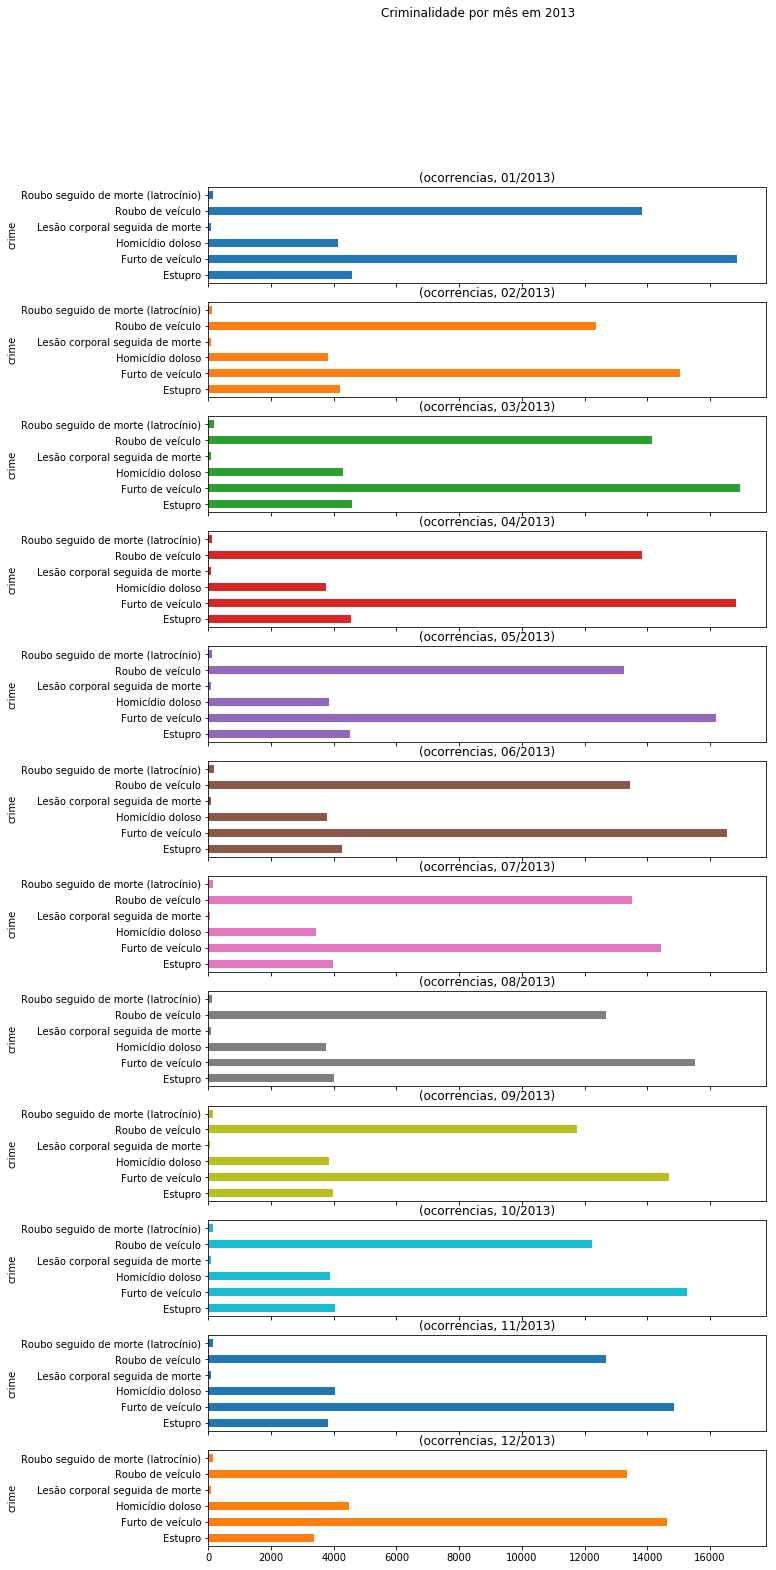

In [277]:
crime_per_month_bar_graph = crimes_per_month.unstack(level=0)
crime_per_month_bar_graph.plot(kind="barh", figsize=(10,25), subplots=True, legend=False, title="Criminalidade por mês em 2013")

Abaixo, outro gráfico foi criado com os mesmos dados, porém com uma abordagem diferente, é realizada uma verificação em como os dados são alterados durante os meses

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f80da3afeb8>>

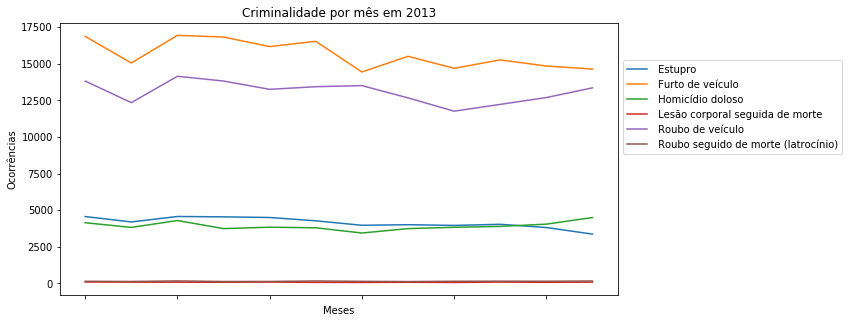

In [278]:
crime_per_month_line_graph = crimes_per_month.unstack(level=1).plot(kind="line", figsize=(10,5), subplots=False, legend=False, title="Criminalidade por mês em 2013")
legend_handless = crime_per_month_line_graph.get_legend_handles_labels()
legend = []
for label in legend_handless[1]:
    legend.append(label.split(",")[1][:-1])
crime_per_month_line_graph.legend(legend,loc="lower left", bbox_to_anchor=(1, 0.5))
crime_per_month_line_graph.set_ylabel("Ocorrências")
crime_per_month_line_graph.set_xlabel("Meses")
crime_per_month_line_graph.plot

Veja que, há um certo padrão na distribuição dos dados, onde certos tipos de crimes apresentam valores muito próximos, aqui, conseguimos perceber por exemplo que, o furto de carro ao longo de todo o ano de 2013 foi muito alto, além ainda de crimes de lesão corporal e estrupo, que mantiveram as mesmas quantidades quase durante o ano todo.  

### Crimes por cidade

Vamos agora olhar quais cidades tiveram os maiores índices de cada um dos tipos de crime, no ano de 2013.

In [426]:
crimes_per_city = year.groupby(['municipio','crime'], as_index=False).agg({'ocorrencias':sum})

Pronto! Agora os dados estão agrupados levando em consideração os municípios com a maior quantidade de um determinado tipo de crime, vamos criar uma visualização para facilitar o entendimento dos dados.

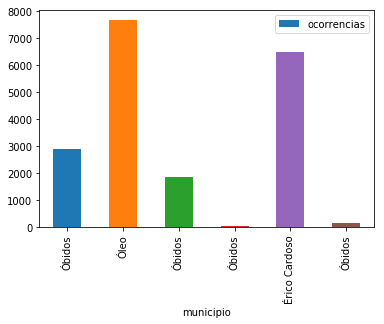

In [568]:
crime_per_city_graph = crimes_per_city.groupby(['crime']).agg({'municipio':max,'ocorrencias':max})
crime_per_city_graph.plot(kind='bar', x='municipio',y='ocorrencias')

Com esta visualização é possível entender que, a cidade com maiores registros de estrupo é Sâo Paulo, bem como o Furto de veículo tem as maiores ocorrências no Rio de Janeiro, e assim por diante. 

## Expansão temporal da análise

Bom, diante aos dados de um único ano obtivemos diversas informações interessantes, porém, vamos avançar! Vamos entender os fenômenos destes dados ao decorrer dos anos.

> Veja que esta avaliação será possível já que o **SINESPJC** disponibiliza uma base de dados de 2004 até 2017.
Vale lembrar que, caso você queira, é possível baixar estes dados utilizando o script disponível no [Github](https://github.com/M3nin0/ocorrencias-brasil/tree/master/recuperacao_dados).

Vamos começar carregando todos os dados

In [280]:
data = read_all_data()

Como explicado anteriormente, a coluna codigo_IBGE não é necessária, portanto será excluída novamente

In [281]:
del(data['codigo_IBGE'])

Beleza! Com os dados carregados, vamos novamente visualizar sua estrutura. Este passo é importante para o entendimento dos dados.

In [282]:
data.head()

,regiao,uf,estado,municipio,crime,ano,mes,ocorrencias
0,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,1,01/2006,2.0
1,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,2,02/2006,2.0
2,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,3,03/2006,1.0
3,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,4,04/2006,2.0
4,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,5,05/2006,1.0


In [283]:
data.tail()

,regiao,uf,estado,municipio,crime,ano,mes,ocorrencias
27092,SUL,SC,Santa Catarina,Balneário Rincão,Estupro,6,06/2017,1.0
27093,SUL,SC,Santa Catarina,Balneário Rincão,Furto de veículo,1,01/2017,5.0
27094,SUL,SC,Santa Catarina,Balneário Rincão,Furto de veículo,2,02/2017,5.0
27095,SUL,SC,Santa Catarina,Balneário Rincão,Furto de veículo,6,06/2017,2.0
27096,SUL,SC,Santa Catarina,Balneário Rincão,Roubo de veículo,2,02/2017,1.0


Os dados não possuem uma coluna com o valor dos anos, portanto esta foi criada a partir da coluna mes com o comando abaixo:

In [284]:
data['ano'] = data['mes'].apply(lambda element: element.split("/")[1])

Para confirmar que a coluna foi alterada os dados foram visualizados novamente

In [285]:
data.head()

,regiao,uf,estado,municipio,crime,ano,mes,ocorrencias
0,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,2006,01/2006,2.0
1,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,2006,02/2006,2.0
2,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,2006,03/2006,1.0
3,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,2006,04/2006,2.0
4,CENTRO-OESTE,DF,Distrito Federal,Brasília,Estupro,2006,05/2006,1.0


Veja que há uma varição grande nos meses e anos e ainda, que a estrutura base é a mesma dos dados vistos para um único ano (2013), vamos então começar esta nova etapa de análise.

Agora, vou criar uma `linha do tempo` variando com a quantidade total de ocorrências em cada um dos anos presentes no conjunto de dados.

In [286]:
crime_occurrences = data.groupby(['ano']).agg({'ocorrencias':sum})

Bem, acima apliquei apenas uma função para gerar um coluna com apenas os valores dos anos, vamos agora agrupar os dados pelos anos e então realizar a contagem.


Com os dados agrupados, vamos realizar o plot para visualizar o resultado.

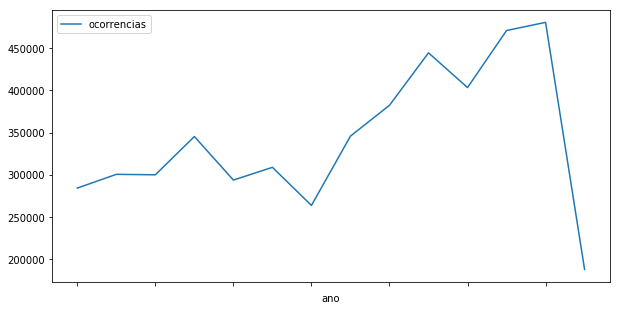

In [287]:
crime_occurrences.plot(kind="line",figsize=(10,5))

Veja que, ao longo dos anos a quantidade de crimes só aumentou, tendo uma queda em 2017. Veja que, a queda em 2017, pode estar vinculada com os dados que estão disponíveis para este, isto porque, em 2017 nem todos os meses estão disponíveis.

Esta informação é bastante interessante, porém, e com relação a cada um dos crimes ? Qual foi sua variação ao longo dos anos, vamos entender isto agora.


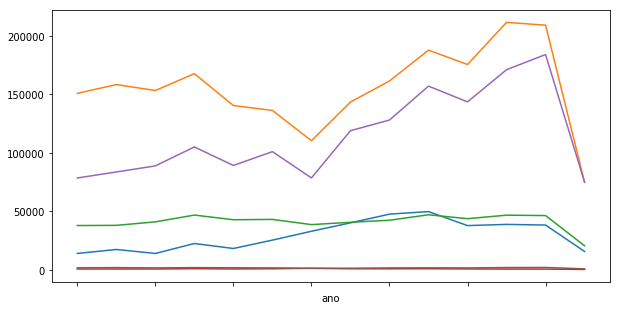

In [288]:
crimes_in_history = data.groupby(['crime','ano']).agg({'ocorrencias':sum})
crimes_in_history.unstack(0).plot(kind="line",legend=False, subplots=False,figsize=(10,5))

Veja que interessante, conseguimos visualizar a variação no tempo de cada um dos tipos de crimes, sendo os que mais variam `Furto, Roubo, Estrupo e Homicídio doloso`.

Ao ver este último gráfico, me surgiu a curiosidade de saber qual os anos apresentaram os maiores números de ocorrências para cada um dos crimes. Vamos fazer isto então. 


In [289]:
max_occurrences_by_year = data.groupby(['crime','ano']).agg({"ocorrencias":sum}).unstack(1).sum()

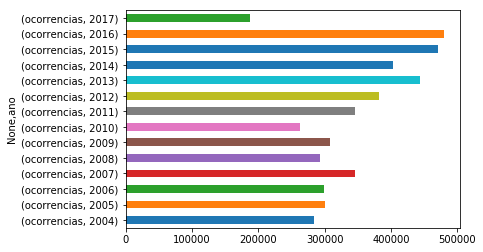

In [290]:
max_occurrences_by_year.plot(kind="barh")

Bem acima apenas agrupei os dados, vamos agora realizar o plot para obter as informações de cada um dos anos e seus crimes.


Como podemos ver no gráfico acima, para todos os crimes, os maiores índices estão entre 2010 e 2016, o que demonstra que este período de tempo representaram muito mais violência que qualquer outro desde 2004.

É importante nos atentarmos aos crimes de lesão corporal e latrocínio, que em todos os resultados apareceram em baixa, isto pode realmente ocorrer, ou mesmo falta de dados podem estar causando caractarística.

## Agrupamento dos dados utilizando SOM

Como forma de entender melhor as características dos dados, farei a utilização dos mapas de Kohonen para o agrupamento dos dados por características, e assim verificar se novas características passíveis de serem análisadas podem aparecer.